### 0. Install and Import Dependencies

In [2]:
!pip install torch torchvision torchaudio
!pip install easyocr


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 2.9/2.9 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 95.1/95.1 kB 2.7 MB/s eta 0:00:00


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 313.0/313.0 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 38.1/38.1 MB 5.0 MB/s eta 0:00:00


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

### 1.  Read in mages or video

In [54]:
IMAGE_PATH = 'textboard-fullscreen.jpg'

In [55]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[7, 13], [61, 13], [61, 33], [7, 33]], 'Editor', 0.9999784891390124),
 ([[95, 19], [159, 19], [159, 35], [95, 35]], 'App Nome', 0.937890833225837),
 ([[183, 19], [243, 19], [243, 35], [183, 35]],
  'File Name',
  0.9022114179331113),
 ([[25, 77], [96, 77], [96, 101], [25, 101]], 'Paragraph', 0.9996156720575606),
 ([[527, 77], [551, 77], [551, 97], [527, 97]], 'J=', 0.23987520801039033),
 ([[575, 79], [597, 79], [597, 97], [575, 97]], '1', 0.49385140142002015),
 ([[607, 79], [629, 79], [629, 97], [607, 97]], '1', 0.5476245381243103),
 ([[687, 81], [735, 81], [735, 95], [687, 95]], 'Default', 0.9994162331448588),
 ([[763, 81], [799, 81], [799, 97], [763, 97]], '8Opx', 0.6993039846420288),
 ([[39, 143], [1426, 143], [1426, 236], [39, 236]],
  "The 'greenest football club in the world'",
  0.7481472044847626),
 ([[36, 266], [1853, 266], [1853, 375], [36, 375]],
  'From veganism to solar panels, chairman Dale Vince',
  0.7879950777110162),
 ([[30, 367], [1881, 367], [1881, 479], [30, 479

### 2.  Results

In [56]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

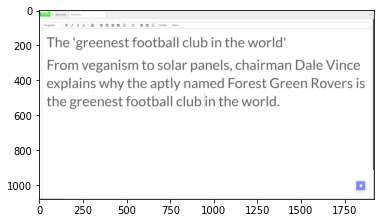

In [57]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

### 3. Handling Multiple Lines

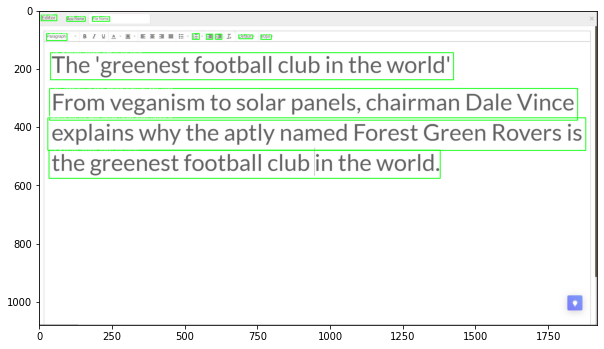

In [58]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,top_left,font,0.5,(255,255,255),1, cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

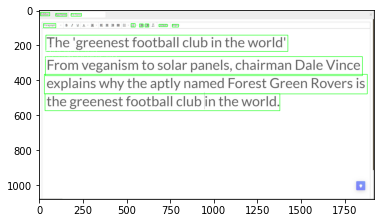

In [59]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,255,255),1,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()